In [1]:
from math import sqrt
import matplotlib.pyplot as plt
from scipy.stats import norm

from my_functions import quadratic_eq
from my_functions import get_geom_var

# Задача 2.3
Известно, что электричка "Вашингтон-Петушки" аварийно останавливается раз в несколько дней. Аналитики РЖД проанализировали, сколько дней электричка едет без поломок, и составили выборку:

x = (3, 22, 13, 6, 18, 5, 6, 10, 7, 15).

РЖД хочет проверить гипотезу, что дисперсия распределения равна 9 против правосторонней альтернативы.

Требуется:

- Ввести предположение, каким распределением описывается данная выборка.
- Записать задачу формально.
- Предложить критерий для оценки дисперсии распределения.
- Проверить гипотезу о значении дисперсии распределения для уровня значимости alpha = 0.05 аналитически.
- Вывести и получить доверительный интервал для значения дисперсии при alpha = 0.05.

In [2]:
s_star = 9
x = [3, 22, 13, 6, 18, 5, 6, 10, 7, 15]
alpha = 0.05
n = len(x)

## 1. Формально предположение
Положим, вероятность поломки равна $p$. Тогда $x_{i}$ это первая встреча 1 в реализации бернулевской случайной величины. Что представляет из себя геометрическое распределение. $X $

Можно найти дисперсию геометрического распределения: $\mathrm{Var} = \frac{1-p}{p^{2}}$

Зная дисперсию `s=9` можно вычислить предполагаемое значение параметра

In [3]:
p_0 = quadratic_eq(s_star, 1, -1)[1]
p_0

0.2823756961276789

## 2. Записать задачу формально

$X \sim Geom(p)$

$H_{0}: \mathrm{Var} = 9$

$H_{1}: \mathrm{Var} > 9$

## 3. Предложить критерий

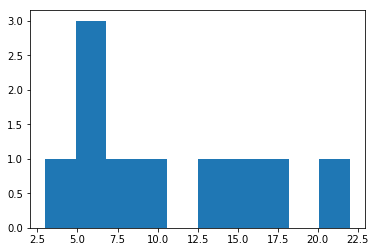

In [4]:
_ = plt.hist(x)

Непохоже на нормальное распределение. Воспользуемся <b>критерием меток</b>
## 4. Проверить гипотезу аналитечески

$$ Z(X) = \frac{S(\theta_0)}{\sqrt{I(\theta_0)}} $$
$ S(\theta) = (ln(L(X, p))_{p}' $

$\log L = \sum \log p(1-p)^{x_i-1} = n\log p + \sum (x_i - 1)\log (1-p)$

$$S(p) = \frac{n}{p} - \frac{\sum x_i-1}{1-p} = \frac{n}{p} + \frac{n}{1-p} - \frac{\sum x_i}{1-p} $$

$I = - \mathbb{E} \left(-\frac{n}{p^2} - \frac{\sum x_i-1}{(1-p)^2} + \frac{n}{(1-p)^2}\right) = \frac{n}{p^2(1-p)}$

In [5]:
s = n / p_0 + n / (1 - p_0) - sum(x) / (1 - p_0)
i = n / (p_0**2 * (1 - p_0))
z = s/sqrt(i)
print(f's={s:.2f}, I={i:.2f}\nZ={z:.2f}')
if z < norm.ppf(alpha):
    print('reject')
else:
    print('accept')

s=-96.97, I=174.76
Z=-7.34
reject


## 5. Вывести и получить доверительный интервал

Оценим его методом Вальда - приблизив нормальным распределением $p_{MLE} \pm z_{1-\frac{\alpha}{2}} \cdot \sqrt{I(p_{MLE})^{-1}}$

$p_{MLE}$ получается, занулив $S(p)$

$p_{MLE} = \frac{n}{\sum x_i}$

In [6]:
p_mle = n / sum(x)
i_mle = n / (p_mle**2 * (1 - p_mle))
left_b = p_mle - norm.ppf(1 - alpha / 2) * sqrt(1 / i_mle)
right_b = p_mle + norm.ppf(1 - alpha / 2) * sqrt(1 / i_mle)
left_b, right_b

(0.03909117426819991, 0.15138501620799055)

Этим значениям параметра можно сопоставить значение дисперсии

In [7]:
min(get_geom_var(right_b), get_geom_var(left_b)), max(get_geom_var(right_b), get_geom_var(left_b))

(37.029249706360005, 628.8176877798868)

Можно в заключение сказать, что с дисперсией они очень сильно не угадали.

Правая граница не адекватная вовсе, на мой взгляд

Оу, это нужно было в .pdf делать...